# Politics Analysis
Marianne Aubin Le Quere
November 6th 2019

We want to know what different dimensions we are working with in our dataset. This will better allow us to see whether we are succeeding at our significance tests.

Credit to: https://github.com/kapadias/mediumposts/blob/master/nlp/published_notebooks/Introduction%20to%20Topic%20Modeling.ipynb
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


In [1]:
# import required modules and set up environment
import os
import numpy as np
import pandas as pd

# replace file path below with your own local convokit
os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/cs6742-fork')

import convokit

from convokit import Corpus, Parser, PolTracker, Transformer
import nltk

## 1. Read in data

In [2]:
# load corpus, this takes a long time so you can also use a different corpus as a test
#corpus = convokit.Corpus(filename='../politics-filtered-labelled')
corpus = convokit.Corpus(filename=convokit.download("reddit-corpus-small"))

Dataset already exists at /Users/marianneaubin/.convokit/downloads/reddit-corpus-small


In [5]:
# now put all utterances into a df

conv_text = []

for conv_id in corpus.conversations:
    conv = corpus.get_conversation(conv_id)
    for utt in conv.iter_utterances():
        conv_text.append(utt.text)
    
print(len(conv_text))
            

297132


In [138]:
# create dataframe
s = pd.DataFrame(conv_text, columns=['utt_text'])

In [139]:
s.head()

,utt_text
0,"Talk about your day. Anything goes, but subred..."
1,How to spoil a kpop fangirl's day. Tell her yo...
2,"His ""candid"" pics look better leh"
3,wat.. he looks like a random extra in a JAV
4,“Hi Kpop girl can I send you a pic of g-dragon...


## 2. Data Cleaning
Now we clean the data to get rid of punctuation and upper/lower caase.



In [180]:
##WARNING: this is not working as expected. go back later.

import re
# remove lowercase and strip whitespaces
#remove punctuation
s["utt_text_cleaned"] = s['utt_text'].str.replace('&gt;',' ').str.replace('&lt;',' ')\
    .str.replace('\.',' ').str.replace('\n',' ').str.replace('[^\w\s]','').str.lower().str.strip()

In [183]:
s[250:270]

,utt_text,utt_text_cleaned
250,&gt;the issue seems to be less prominent as co...,the issue seems to be less prominent as compar...
251,"Good for you then, enjoy reading your Chinese ...",good for you then enjoy reading your chinese c...
252,"&gt; Good for you then, enjoy reading your Chi...",good for you then enjoy reading your chinese c...
253,&gt; This is exactly why you just don't get it...,this is exactly why you just dont get it don...
254,"Multiple people have tried to tell you, only t...",multiple people have tried to tell you only to...
255,**Petitions**\n \n[For repeal](https://www.cha...,petitions for repealhttpswww change orgpthes...
256,"""For Repeal"" is going to need some serious tr...",for repeal is going to need some serious trac...
257,The difference shock me,the difference shock me
258,That's because religious leaders are actively ...,thats because religious leaders are actively s...
259,Which is what I find funny - the pro-repeal si...,which is what i find funny the prorepeal side...


In [182]:
s.head()

,utt_text,utt_text_cleaned
0,"Talk about your day. Anything goes, but subred...",talk about your day anything goes but subredd...
1,How to spoil a kpop fangirl's day. Tell her yo...,how to spoil a kpop fangirls day tell her you...
2,"His ""candid"" pics look better leh",his candid pics look better leh
3,wat.. he looks like a random extra in a JAV,wat he looks like a random extra in a jav
4,“Hi Kpop girl can I send you a pic of g-dragon...,hi kpop girl can i send you a pic of gdragon ...


## 3. Exploratory Analysis
Check whether preprocessing was done well.

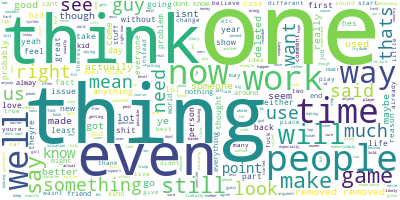

In [185]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(s['utt_text_cleaned'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()